## Linear regression

A **linear** regression is a **linear approximation** of a **casual relationship** between **two or more variables**:

* Dependent varialble $y$
* Independent varialble $x_1, x_2, ... x_n$
* The dependent variable $y$ is assume to be a linear combination of the independent varialbels + a 0 mean noise factor:
$$ \large y = \beta_0 + \beta_1*x_1 + \beta_2*x_2 ... \beta_n * x_n + \epsilon$$


### Regression fit metrics

There are multiple metrics available for measuring the goodness of fit of a regression function:
* [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - The average of the squared error: $\displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2$
* [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error): - The average of the absolut error: $\displaystyle\frac{1}{n}\sum_{t=1}^{n}|e_t|$
* [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) - $R^2$ - the proportion of the variation explained by our model: $\displaystyle\ R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ whereas:
  * $SS_{tot}$ is the overall variablility in the dataset: $\displaystyle\sum_{i=1}^{n}{(y_i -\bar{y})^2}$
  * $SS_{res}$ is the overall variability in the error $\displaystyle\sum_{i=1}^{n}e_i^2$
  * R2 ranges from 0 (the model did not explain any of the variance in the dataset) to 1 (the model perfectly explains all variance in the dataset)

* [Adjusted R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2) - This metric takes into account the model complexity as well, punishing models which have many dependent varialbles which does not contribute to the explainability of the dataset. Defined as: $R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$ - where $p$ in the total number of predictros in the model and $n$ is the sample size.

<font size=3 color='red'><b>Exercise: write a function called compute_regression_metrics() that computes 'MSE', 'MAE' and 'R2' given a dataframe with proper colmuns.</b></font>

*Don't compute adjusted r2, as it requires n_predictors (you'd call it from a different place)

In [19]:
# def compute_regression_metrics(y_true, y_pred):

<font size=3 color='red'><b>Exercise: write a function that computes adjusted r2 score.</b></font>

In [20]:
# def adjusted_r2_score(y_true, y_pred, n_predictors):

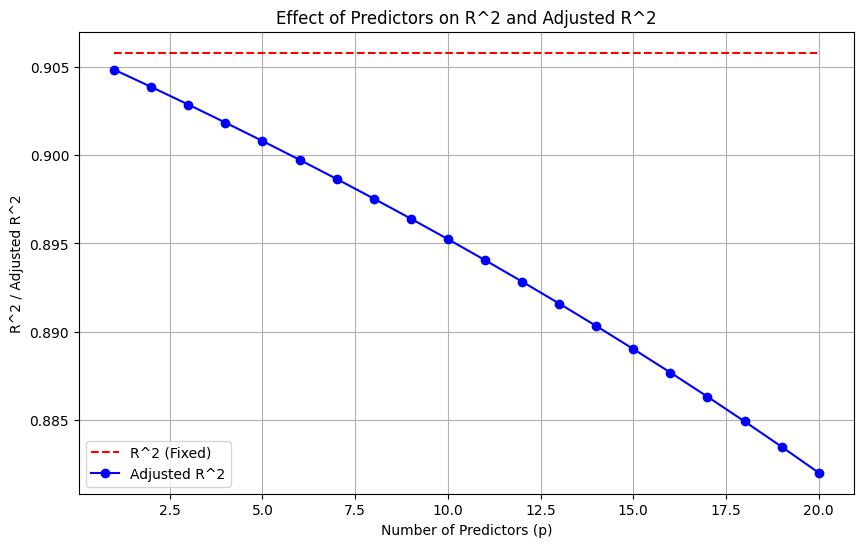

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate some data
np.random.seed(42)
n_observations = 100
true_y = np.random.rand(n_observations) * 10
pred_y = true_y + np.random.normal(0, 1, n_observations)  # Add some noise

# Fixed R^2 value for simplicity
r2 = r2_score(true_y, pred_y)

# Compute Adjusted R-Squared for increasing predictors
n_predictors_range = range(1, 21)  # Number of predictors
adjusted_r2_values = [adjusted_r2_score(true_y, pred_y, p) for p in n_predictors_range]

# Plot R^2 vs Adjusted R^2
plt.figure(figsize=(10, 6))
plt.plot(n_predictors_range, [r2] * len(n_predictors_range), label='R^2 (Fixed)', linestyle='--', color='red')
plt.plot(n_predictors_range, adjusted_r2_values, label='Adjusted R^2', marker='o', color='blue')
plt.xlabel('Number of Predictors (p)')
plt.ylabel('R^2 / Adjusted R^2')
plt.title('Effect of Predictors on R^2 and Adjusted R^2')
plt.legend()
plt.grid()
plt.show()

The plot shows:
* R^2 remains constant as it does not penalize additional predictors.
* Adjusted 𝑅^2 decreases when the number of predictors becomes excessive relative to the data.

## Multiple predictors - Predicting university scores

The following dataset was collected from 100 uni grads and contains information about their high school grades, their psychometric exam score, their participation in lesson scores and their university graduation score:

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('university_scores.csv')
df.head()

,high_school_score,internal_exam_score,psycho_score,attandance_score,participation_score,uni_score
0,91,7865,658,8,8,95
1,80,6968,645,4,7,82
2,92,6856,548,3,6,86
3,92,7352,432,8,6,80
4,83,8338,544,4,6,78


NOTE: we'll skip train-test split THIS TIME and use train as the full setm

<font size=3 color='red'><b>Exercise: check the features correlation with the target variable (uni_score).</b></font>

<font size=3 color='red'><b>Question: which features would probably be most important for regression according to this view?</b></font>

<font size=3 color='red'><b>Exercise: write a compute_regression fuction which fits a regression model on a given data set and returns all its metrics (including r^2 adjusted).</b></font>

In [27]:
# def compute_regression(X, y):


<font size=3 color='red'><b>Exercise: write a compare_regression function which computes regression on all possible combinations of predictors, and store the results in a new dataframe.
The output dataframe should consist of a table with 3 columns: the name of the predictors used, the R squared score and the adjusted R square score.
Sort it ascending by the adjested score</b></font>

In [37]:
# def compare_regression(data_df, target_col):

<font size=3 color='red'><b>Question: According to the results above, which is the most useful predictor/feature to predict the target?</b></font>

Answer:

### Feature importance

In [49]:
target_col = 'uni_score'
predictor_cols = [c for c in df.columns if c != target_col]

model, metrics = compute_regression(df[predictor_cols], df[target_col])

metrics

{'MSE': 2.0901627092128385,
 'MAE': 1.1518959817419208,
 'R2': 0.9250042084357297,
 'adjusted_R2': 0.9210150705865664}

In [50]:
def print_model_coef(model):
  print('const', '\t', model.intercept_)

  for name, c in zip(predictor_cols, model.coef_):
    print(name, '\t', c)

print_model_coef(model)

const 	 -6.8450354888399545
high_school_score 	 0.6094970734974131
internal_exam_score 	 -0.00037568330110454183
psycho_score 	 0.02760403310839322
attandance_score 	 -0.050066239808431355
participation_score 	 3.540492131724993


When all predictors are zero, the model predicts −6.845 for uni_score.

<font size=3 color='red'><b>Question: According to the results above which is the most useful predictor/feature to predict the target?</b></font>

Answer

For feature importance and in general, model interpertation, we need to scale all the features to the same magnitude. We can do it by either:
* Standartization - transform each feature into a zero one unit variance distribution
* Normalization/Scaling - transform each feature into the intreval (0,1] by removing the minimum value and dividing by the max-min value.

<font size=3 color='red'><b>Question: After normalizing the predictors, analyze the coefficients of the model. What can you infer about the importance of each feature in predicting the target?</b></font>

In [70]:
# Answer

const 	 81.36
high_school_score 	 2.529779995281098
internal_exam_score 	 -0.21245132083339086
psycho_score 	 2.619145299960885
attandance_score 	 -0.12743210436483104
participation_score 	 2.8323937053799937


- participation_score has the highest standardized coefficient, making it the most predictive feature for uni_score.
- internal_exam_score has a non-trivial inverse impact.

### Logistic regression

<font size=3 color='red'><b>Task:
Train a logistic regression model to predict whether a student will achieve a high score (above 75) or low score (75 or below) in their final grade. Use a pipeline to ensure proper preprocessing and apply GridSearchCV to optimize the model’s hyperparameters.</b></font>

In [80]:
# Answer

<font size=3 color='red'><b>Task:
Train a multiclass logistic regression model to classify students' scores into three categories: Low, Medium, and High. Your goal is to use logistic regression to predict the score category based on the given predictors and evaluate the model's performance.</b></font>

In [81]:
# Answer